In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from operator import itemgetter
import pandas as pd
from sklearn.cross_validation import train_test_split

import csv
import nupic

In [2]:
data = scipy.io.loadmat('./code/SANDBOX/PWAccSSD4x4.mat') 
#data = scipy.io.loadmat('0705_alex_im_first.mat') 
print data.keys()

['a', 'PWAcc', '__header__', '__globals__', 'SelChanIndices', '__version__']


In [18]:
# temp = data['a'][0][0]
# print temp[0].shape
# print '\n', temp[0]

In [43]:
# fieldnames = ['w' + str(i+1) for i in range(6)]
# fieldtypes = ['float' for i in range(6)]
# fieldflags = ['S' for i in range(6)]
# print fieldnames

['w1', 'w2', 'w3', 'w4', 'w5', 'w6']


In [3]:
# columns = pd.MultiIndex.from_tuples(
#     zip(['w' + str(i+1) for i in range(6)], 
#         ['float' for i in range(6)], 
#         ['S' for i in range(6)]))
# df = pd.DataFrame(temp[0], columns=columns)
# df.to_csv('data_temp1.csv', index=False)
# df

In [4]:
data = scipy.io.loadmat('./lab_data/24chan/alex_long_1.mat') 
print data.keys()
print data['data_cur'].shape, data['states_cur'].shape
print data['data_cur']

['__version__', '__globals__', '__header__', 'chan_names', 'states_cur', 'data_cur', 'srate']
(24, 100717) (1, 100717)
[[ -3.02503101e+03  -3.02501318e+03  -3.02519214e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.89819751e+03  -3.90012866e+03  -3.90227441e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.94164746e+03  -5.93876855e+03  -5.93717676e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [ -6.77808545e+03  -6.77838916e+03  -6.75793311e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.31518008e+04  -1.31504600e+04  -1.31444697e+04 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.78813934e-02  -1.78813934e-02  -1.78813934e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


[1 1 1 ..., 6 6 6]
[1 2 6]


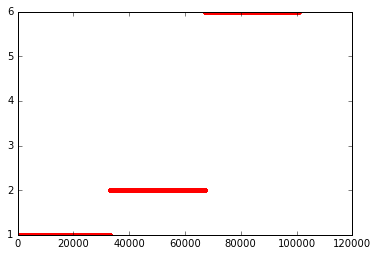

In [5]:
print data['states_cur'][0]
print np.unique(data['states_cur'][0])
plt.plot(range(len(data['states_cur'][0])), data['states_cur'][0], '.r')

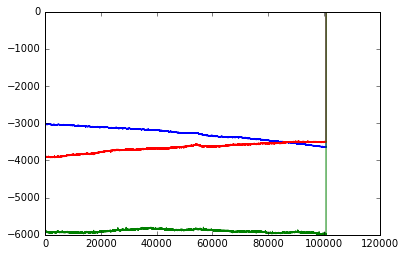

In [6]:
plt.plot(range(len(data['states_cur'][0])), data['data_cur'][0], '-b')
plt.plot(range(len(data['states_cur'][0])), data['data_cur'][1], '-r')
plt.plot(range(len(data['states_cur'][0])), data['data_cur'][2], '-g')

In [7]:
temp = data['data_cur']
temp = temp.T
names_df = ['field' + str(i+1) for i in range(temp.shape[1])]
#tempdf = pd.DataFrame(temp, columns= names_df)
tempdf = pd.DataFrame(temp)
#tempdf['classification'] = data['states_cur'][0] 
tempdf[24] = [0 if i == 6 else i for i in data['states_cur'][0]]
print tempdf.head()

            0            1            2           3           4           5   \
0 -3025.031006 -3898.197510 -5941.647461 -143.265717  223.767761 -896.394226   
1 -3025.013184 -3900.128662 -5938.768555 -139.367584  225.287674 -896.894958   
2 -3025.192139 -3902.274414 -5937.176758 -138.205292  225.430725 -896.054504   
3 -3022.474121 -3898.537109 -5932.116699 -136.184692  228.291748 -893.175598   
4 -3019.648682 -3890.043457 -5928.969238 -131.589172  232.779984 -891.941772   

             6            7             8            9  ...            15  \
0 -11081.028320 -9336.876953 -50944.109375 -8007.466797 ... -31958.019531   
1 -11080.598633 -9336.948242 -50917.480469 -8008.665039 ... -31957.037109   
2 -11080.205078 -9336.787109 -50951.457031 -8010.721191 ... -32048.822266   
3 -11071.533203 -9329.348633 -50996.410156 -8014.029297 ... -32114.500000   
4 -11068.529297 -9326.237305 -50985.449219 -8013.957520 ... -32055.687500   

            16           17          18           19    

In [21]:
nfields = len(tempdf.columns) - 1
new_header = [names_df + ['classification'], ['float'] * nfields + ['int'],
              [''] * nfields + ['C'] ]
for i in new_header:
    i = ','.join(i)
    print i


field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,classification
float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int
,,,,,,,,,,,,,,,,,,,,,,,,C


In [ ]:
with open('./lab_data/24chan/24chan_data_1.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    tempdf.to_csv(csvfile, header = False, index = False)

In [14]:
for i in tempdf.columns:
    print i+1, min(tempdf[i]), max(tempdf[i])
# mincol, maxcol = [min(tempdf[i]) for i in tempdf.columns], [max(tempdf[i]) for i in tempdf.columns] 
# print min(mincol), max(maxcol)
# print mincol
# print maxcol

1 -3648.39428711 0.0
2 -3930.25878906 0.0
3 -5998.58154297 0.0
4 -147.789718628 453.811889648
5 0.0 314.462188721
6 -1015.77044678 0.0
7 -11088.2695312 0.0
8 -9336.94824219 0.0
9 -52709.5898438 0.0
10 -8252.37011719 0.0
11 0.0 2848.23779297
12 -6205.79101562 0.0
13 0.0 2256.07763672
14 0.0 0.0
15 -13038.59375 0.0
16 -32720.9296875 0.0
17 -2177.86425781 0.0
18 0.0 1145.01708984
19 -292.736297607 28.3062458038
20 -7302.90429688 0.0
21 -3948.30102539 0.0
22 -6918.31103516 0.0
23 -13195.2167969 0.0
24 -0.0178813934326 0.0
25 1 6


In [22]:
train_index, test_index = train_test_split(range(tempdf.shape[0]), test_size=0.33, random_state=42)
train_index.sort(), test_index.sort()

traindf, testdf = tempdf.iloc[train_index], tempdf.iloc[test_index]

#traindf, testdf = train_test_split(tempdf, test_size=0.33, random_state=42)


with open('./lab_data/24chan/24chan_train1.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    traindf.to_csv(csvfile, header = False, index = False)

with open('./lab_data/24chan/24chan_test1.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    testdf.to_csv(csvfile, header = False, index = False)

In [23]:
print traindf.shape
print testdf.shape

# print traindf.head
# print testdf.head

(67480, 25)
(33237, 25)
